# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [8]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [9]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


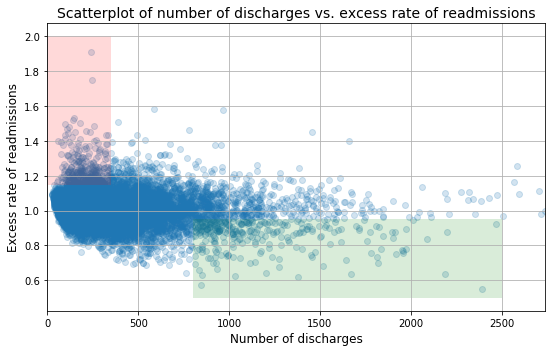

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A

I do not see a clear correlation between the number of discharges and the excess readmission rate from the scatterplot above. The analysis pulls trends from what could very well be outliers in the red and green boxes. Furthermore, the definitions for "large" and "small" hospitals vary from greater than 1000 discharges and fewer than 100 discharges, respectively, to greater than 850 discharges and fewer than 350 discharges, respectively. We need to standardize our definitions of large and small hospitals to draw meaningful and consistent conclusions.
Additionally, we cannot conclude that there is a "significant" correlation between these two variables without performing some statistical work to back up these claims.



# B

We define our null hypothesis that there is no difference in the excess readmission rate between hospitals with fewer than 350 discharges and hospitals with more than 800 discharges (to match the boundaries set by the red and green boxes in the scatterplot). Our alternate hypothesis is that a difference does exist, although whether or not the excess readmission rate for smaller hospitals is higher or lower is yet to be determined.

In [11]:
#Defining small and large hospitals by the number of discharges
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 350]
large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 800]

In [12]:
smallReadmis = small['Excess Readmission Ratio']
largeReadmis = large['Excess Readmission Ratio']

print('Mean excess readmission ratio for small hospitals =', smallReadmis.mean())
print('Mean excess readmission ratio for large hospitals =', largeReadmis.mean())

Mean excess readmission ratio for small hospitals = 1.0133321663332373
Mean excess readmission ratio for large hospitals = 0.9854186874304783


In [13]:
pctSmall = smallReadmis[smallReadmis > 1].count() / smallReadmis.count()
pctLarge = largeReadmis[largeReadmis > 1].count() / largeReadmis.count()

print('Percent of small hospitals with excess readmission ratios greater than 1 =', pctSmall * 100)
print('Percent of large hospitals with excess readmission ratios greater than 1 =', pctLarge * 100)

Percent of small hospitals with excess readmission ratios greater than 1 = 53.31523292369248
Percent of large hospitals with excess readmission ratios greater than 1 = 47.27474972191324


In [14]:
print('# of total hospitals in population:', clean_hospital_read_df['Number of Discharges'].count())
print('# of small hospitals:', smallReadmis.count())
print('# of large hospitals:', largeReadmis.count())

# of total hospitals in population: 11578
# of small hospitals: 6998
# of large hospitals: 899



As shown above, we have large enough samples to avoid the t-test, and we also know the variance of the population these samples were drawn from so we can use the z-test to determine the p-value. We first find the z-score for our null hypothesis, using zero as the true difference between the means.


In [15]:
import math
meanDiff = smallReadmis.mean() - largeReadmis.mean()
SE = math.sqrt(smallReadmis.std()**2/smallReadmis.count() + largeReadmis.std()**2/largeReadmis.count())

zScore = meanDiff / SE
print('Critical Z-score =', zScore)

Critical Z-score = 6.916447826293505


Without even needing to consult a Z-table, we know that a score of 6.92 is at the very extreme right end of the curve.
The alternate hypothesis is that large hospitals have a lower mean excess readmission rate than small ones. The z-score would remain the same but for a one-tailed test, we do not double the p-value obtained.
This is still a very tiny value so we can reject the null hypothesis and accept the alternate hypothesis that large hospital do indeed have a lower mean excess readmission rate than small ones.
We conclude that there is a statistically significant correlation between large hospitals having a lower excess readmission ratio and small ones having a high excess readmission ratio. In terms of practicial significance, there could be other confounding factors leading to this conclusion.

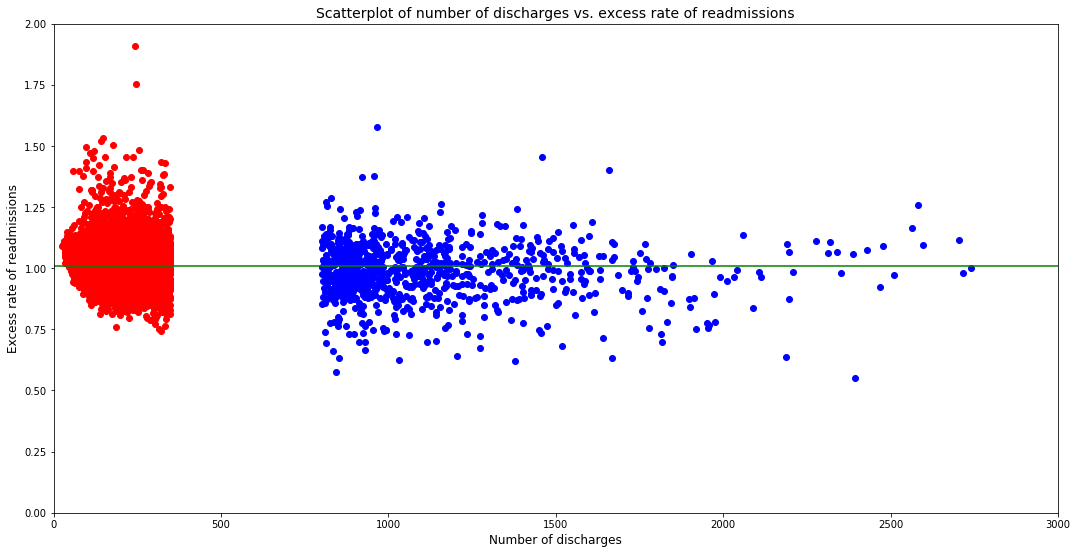

In [16]:
#Create scatterplot of small hospitals with number of discharges as x and excess readmission ratio as y
smallPlot = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 350]
smallPlot.dropna()
x_smallPlot = list(smallPlot['Number of Discharges'])
y_smallPlot = list(smallPlot['Excess Readmission Ratio'])

#Create scatterplot of small hospitals with number of discharges as x and excess readmission ratio as y
largePlot = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 800]
largePlot.dropna()
x_largePlot = list(largePlot['Number of Discharges'])
y_largePlot = list(largePlot['Excess Readmission Ratio'])

fig = plt.figure(figsize=(18, 9))
popMean = clean_hospital_read_df['Excess Readmission Ratio'].mean()
plt.plot(x_smallPlot, y_smallPlot, 'ro')
plt.plot(x_largePlot, y_largePlot, 'bo')

#Add a reference line at the mean for the population
plt.axhline(y = popMean, color='g', linestyle='-')

plt.xlim([0, 3000]);
plt.ylim([0, 2.0]);
plt.xlabel('Number of discharges', fontsize=12);
plt.ylabel('Excess rate of readmissions', fontsize=12);
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14);

The plot provided is busy and does not clearly show a correlation, although the statistics show us one exists. However, it does show the entire population and highlights the areas of focus (small hospitals with high excess readmission ratios and large hospitals with low excess readmission ratios).

The above scatterplot separates out the two clusters of interest (small hospitals with number of discharges less than 350 in red and large hospitals with the number of discharges above 850 in blue). A green reference line is provided that shows the mean excesss readmission ratio of the total population for comparison. One can better see that most of the red data points are above the reference line while the blue points seem to be skewed toward below the reference line.